# Data Processing in Python
Python è ormai considerato il linguaggio di programmazione standard della Data Science. Uno dei motivi che lo hanno portato ad essere tale è anche la presenza della libreria Pandas: quest'ultima permette in pochissime righe di codice di performare pressochè qualsiasi operazione su dei dati.

Quando viene iniziato un progetto di Data Science, la prima cosa che si fa è, generalmente, ispezionare i dati: importarli, riorganizzarli in modo da renderli pronti per i modelli, fare dei grafici e conteggiare anomalie o valori mancanti al loro interno.

In questo esercizio metteremo le mani su un vero dataset (qui le trovate informazioni riguardo al dataset e la sua struttura, leggete con cura: https://www.kaggle.com/CooperUnion/anime-recommendations-database?select=rating.csv): vi performeremo varie operazioni, dove però vi imporrò talvolta dei vincoli sul numero di righe di codice massimo che potete scrivere, l'obiettivo dell'esercizio è infatti quello di mostrare come Pandas abbia un comando per pressoché qualsiasi operazione.

Due file .csv sono già nella stessa cartella di questo notebook: "anime.csv" e "rating.csv", scaricate tutto quanto e mettete tutto nella stessa cartella in locale.

IMPORTANTE: l'utilizzo delle librerie in Python è talvolta molto intricato e nessuno è in grado di programmare ciecamente usando una libreria. Il consiglio che vi do, valido per questo notebook ma più in generale ogni qualvolta programmerete qualcosa, è quello di cercare su internet qualcuno che abbia già fatto la stessa identica cosa che dovete fare voi. Non abbiate paura di andarvi a scrivere letteralmente su Google cose tipo "pandas how to do etc. etc.", nel 95% dei casi troverete esattamente ciò che stavate cercando, altrimenti qualcosa di simile che potrete riadattare da soli cercando nella documentazione come funzionano i comandi che vi interessano.

In [1]:
### qui potete importare tutte le librerie che vi servono
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importare i dataset (2 righe)
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [3]:
# Visualizzare una parte di ognuno dei due dataset (2 righe)
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
# Scegliere ed impostare un indice adeguato per il dataframe "anime" (1 riga)
anime = anime.set_index('anime_id')

In [6]:
anime.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
# Ad ora il dataframe "anime" è ordinato in base al rating (decreasing). Ordinare il dataframe alfabeticamente in base al "name"
# (1 riga)
anime.sort_values(by=['name'],inplace=True)
anime.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
20707,&quot;0&quot;,Music,Music,1,5.06,1170
25627,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,Kids,Movie,1,5.00,113
7669,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,"Comedy, Fantasy, School",OVA,1,7.06,14351
8481,&quot;Bungaku Shoujo&quot; Memoire,"Drama, Romance, School",OVA,3,7.54,18013
6408,&quot;Bungaku Shoujo&quot; Movie,"Drama, Mystery, Romance, School",Movie,1,7.63,40984


In [8]:
# Ci sono degli anime il cui nome non è stato correttamente encodato, rimuovere dal dataframe tutti gli anime il cui nome 
# inizia con '.' oppure '&' (1 riga)
anime = anime.drop(anime[anime.name.str.startswith(('.','&'))].index)
anime.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
12763,0-sen Hayato,"Historical, Military",TV,38,6.25,147
33978,0-sen Hayato Pilot,"Historical, Military",OVA,1,5.14,37
29978,001,Comedy,ONA,1,4.00,916
11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1,6.76,8307
32737,009 Re:Cyborg x Zip,"Comedy, Super Power",ONA,10,5.68,198


In [9]:
# Contare quanti Missing Values (NaN) ci sono in ogni colonna dei due dataframe (2 righe)
num_nan_anime = anime.isna().sum().sum()
num_nan_rating = rating.isna().sum().sum()
print(num_nan_anime, num_nan_rating)

317 0


In [10]:
# Rimuovere tutti i Nan dal dataframe "anime" (1 riga)
anime = anime.dropna()

In [11]:
# Rimuovere tutti i rating -1 dal dataframe "rating" (1 riga)
rating = rating.drop(rating[rating['rating'] == -1].index)

In [12]:
# Adesso il nostro intento è utilizzare il dataframe "rating" per arricchire le informazioni contenute in "anime":
# osservare bene la struttura dei due dataframe, sebbene il rating medio per ogni anime sia già incluso nel dataframe, 
# siamo ora interessati alla deviazione standard del rating.

# Creare un dataframe che abbia come indice l'id di un anime e una colonna con all'interno la deviazione standard
# dei suoi ratings (1 riga)
std_rat = pd.DataFrame({'anime_id': rating['anime_id'].groupby(rating['anime_id']).first(), 'stdev': rating['rating'].groupby(rating['anime_id']).std()}).set_index('anime_id')
std_rat.tail()

,stdev
anime_id,
34324,1.375103
34325,1.397276
34349,1.000000
34367,0.957427
34475,2.081666


In [13]:
# Unire al dataframe "anime" la colonna contenente le deviazioni standard dei rating: attenzione, questa deve essere ovviamente
# coerente con gli indici "anime_id". Quindi sostituire tutti i Nan che possono essersi generati (potremmo avere
# un anime senza alcun voto, oppure con uno solo, quindi deviazione standard Nan) con degli 0. Procedere infine a rimuovere qualsiasi colonna
# "doppione" possa essersi generate dalla prima operazione (massimo 2 righe).
anime = pd.merge(left=anime, right=std_rat, how='left', left_on='anime_id', right_on='anime_id')
anime = anime.fillna(0)
anime

,name,genre,type,episodes,rating,members,stdev
anime_id,,,,,,,
12763,0-sen Hayato,"Historical, Military",TV,38,6.25,147,0.000000
33978,0-sen Hayato Pilot,"Historical, Military",OVA,1,5.14,37,0.000000
29978,001,Comedy,ONA,1,4.00,916,3.465705
11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1,6.76,8307,1.675079
32737,009 Re:Cyborg x Zip,"Comedy, Super Power",ONA,10,5.68,198,0.000000
...,...,...,...,...,...,...,...
793,xxxHOLiC Movie: Manatsu no Yoru no Yume,"Comedy, Drama, Mystery, Psychological, Superna...",Movie,1,8.04,41547,1.232423
6864,xxxHOLiC Rou,"Mystery, Supernatural",OVA,2,8.32,36353,1.245483
4918,xxxHOLiC Shunmuki,"Comedy, Drama, Mystery, Psychological, Superna...",OVA,2,8.17,40401,1.163962


In [14]:
# Prima di procedere oltre ispezioniamo quali tipo di variabile Pandas ha assegnato (autonomamente) ad ogni colonna,
# stampare il tipo di ogni colonna di "anime" (1 riga)
anime.dtypes

name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
stdev       float64
dtype: object

In [15]:
# Il tipo object è usato per le stringhe, una colonna in particolare ha un tipo assegnato che forse non è quello più corretto.
# Ispezionare tutti i possibili valori che può assumere quella colonna e trovare il motivo per cui è stata assegnata con quel 
# tipo da pandas (1 riga)
anime['episodes'].unique()
# Unknown per un certo episodio -> non sono tutti int64

array(['38', '1', '10', '12', '25', '2', '13', '8', '4', '3', '39', '35',
       '23', 'Unknown', '26', '6', '15', '11', '7', '5', '24', '48', '22',
       '20', '51', '50', '178', '27', '42', '52', '31', '74', '53', '28',
       '56', '43', '16', '30', '58', '37', '44', '54', '47', '79', '330',
       '104', '49', '117', '60', '14', '36', '65', '46', '18', '45', '29',
       '21', '33', '19', '59', '75', '68', '32', '34', '61', '17', '366',
       '76', '9', '156', '115', '128', '70', '73', '365', '180', '41',
       '142', '78', '170', '40', '63', '305', '151', '66', '103', '163',
       '1787', '283', '100', '243', '153', '64', '97', '291', '119',
       '145', '175', '102', '71', '130', '84', '260', '77', '199', '108',
       '114', '110', '92', '113', '201', '225', '101', '164', '140', '86',
       '94', '1428', '109', '62', '148', '296', '127', '312', '167',
       '240', '300', '105', '195', '203', '358', '137', '1306', '1565',
       '331', '373', '91', '55', '150', '773', '182

In [16]:
# Una volta trovato l'elemento di disturbo, rimuovere le righe del dataframe che presentano quel valore in quella colonna
# e cambiare il tipo della colonna con quello più appropriato (2 righe)
anime = anime.drop(anime[anime['episodes'] == 'Unknown'].index)
anime['episodes'] = anime['episodes'].astype(np.int64)

In [17]:
# Adesso siamo interessati a fare una piccola analisi suddividendo la variabile "type".
# Fare il conteggio di quanti anime ci sono per ogni tipo (1 riga)
cnt = anime.groupby(['type']).size()
# Calcolare il rating medio per ognuno di questi tipi (1 riga)
avg_rat_type = anime.groupby(['type']).mean().rating
# Calcolare il numero di episodi medio per ognuno di questi tipi (1 riga)
avg_ep_type = anime.groupby(['type']).mean().episodes
# Calcolare il numero di utenti totale per ognuno di questi tipi (1 riga)
tot_mem_type = anime.groupby(['type']).mean().members
print("Number of anime per type: {}".format(cnt))
print("Average Rating per type: {}".format(avg_rat_type))
print("Average number of Episodes per type: {}".format(avg_ep_type))
print("Total number of Members per type: {}".format(tot_mem_type))

Number of anime per type: type
Movie      2254
Music       486
ONA         606
OVA        3238
Special    1659
TV         3565
dtype: int64
Average Rating per type: type
Movie      6.333629
Music      5.589753
ONA        5.640479
OVA        6.369707
Special    6.525057
TV         6.929442
Name: rating, dtype: float64
Average number of Episodes per type: type
Movie       1.099379
Music       1.131687
ONA         6.896040
OVA         2.424027
Special     2.571429
TV         35.989902
Name: episodes, dtype: float64
Total number of Members per type: type
Movie      10553.979592
Music       1314.753086
ONA         4449.237624
OVA         6045.129401
Special     7701.243520
TV         44614.658626
Name: members, dtype: float64


In [18]:
# Adesso siamo interessati a studiare i generi ("genre") degli anime. La prima cosa da fare è un "parsing" della colonna genre.
# In particolare, proveremo adesso a cambiare la struttura del dataframe, calcolando innanzitutto quanti differenti generi ci
# sono in totale, e aggiungendo quindi una colonna per ogni genere al dataframe dal contenuto binario: 1 se l'anime in quella 
# riga contiene quel genere tra i suoi e 0 altrimenti. Questa struttura ci faciliterà in alcune analisi e sostituira la colonna 
# 'genre' che è altrimenti di difficile utilizzo.

# Ottenere il conteggio delle apparizioni di tutti i differenti generi possibili (si può fare una riga ma è hardcore,
# comunque non più di 4-5 righe)
dummies = anime['genre'].str.get_dummies(sep=', ')
genres_count = dummies.eq(1).sum().to_frame('Count')
print(genres_count)
# (per chi vuole provarlo a fare in una sola riga, io ho utilizzato un Counter e i metodi delle liste join, split e replace)

               Count
Action          2744
Adventure       2284
Cars              71
Comedy          4475
Dementia         238
Demons           287
Drama           1967
Ecchi            627
Fantasy         2205
Game             155
Harem            312
Hentai          1099
Historical       787
Horror           360
Josei             52
Kids            1549
Magic            737
Martial Arts     258
Mecha            927
Military         415
Music            831
Mystery          477
Parody           396
Police           194
Psychological    226
Romance         1434
Samurai          145
School          1161
Sci-Fi          2015
Seinen           530
Shoujo           587
Shoujo Ai         54
Shounen         1667
Shounen Ai        62
Slice of Life   1180
Space            376
Sports           526
Super Power      444
Supernatural     993
Thriller          86
Vampire          100
Yaoi              37
Yuri              41


In [19]:
# Adesso aggiungere al dataframe una colonna per ogni genere contenenti labels binarie (1-0 oppure True-False).
# Anche qui, si può fare tutto in una riga ma è davvero intricato, usando il comando join di pandas e il metodo contains delle stringhe.
# Comunque non ci vogliono più di 4-5 righe.
dummies = anime['genre'].str.get_dummies(sep=', ')
anime = pd.concat([anime, dummies], axis=1)
anime

,name,genre,type,episodes,rating,members,stdev,Action,Adventure,Cars,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
anime_id,,,,,,,,,,,,,,,,,,,,,
12763,0-sen Hayato,"Historical, Military",TV,38,6.25,147,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33978,0-sen Hayato Pilot,"Historical, Military",OVA,1,5.14,37,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29978,001,Comedy,ONA,1,4.00,916,3.465705,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1,6.76,8307,1.675079,1,1,0,...,0,0,0,0,0,0,0,0,0,0
32737,009 Re:Cyborg x Zip,"Comedy, Super Power",ONA,10,5.68,198,0.000000,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,xxxHOLiC Movie: Manatsu no Yoru no Yume,"Comedy, Drama, Mystery, Psychological, Superna...",Movie,1,8.04,41547,1.232423,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6864,xxxHOLiC Rou,"Mystery, Supernatural",OVA,2,8.32,36353,1.245483,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4918,xxxHOLiC Shunmuki,"Comedy, Drama, Mystery, Psychological, Superna...",OVA,2,8.17,40401,1.163962,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:title={'center':'rating'}, xlabel='[Adventure, Comedy, Dementia]'>

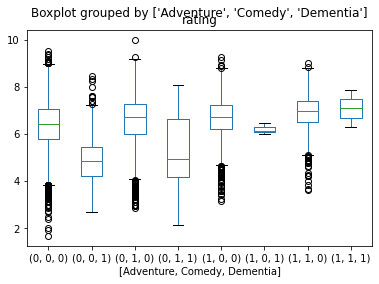

In [20]:
# L'ultima richiesta che vi farò è quella di creare dei plot descrittivi (con matplotlib) dei dati, in particolare:
# 1) scegliete tre generi e plottate in una unica riga, allineati, i boxplot che descrivono la distribuzione dei loro ratings
# 2) create un pie chart per i generi
# 3) plottate in un unico grafico, uno dopo l'altro, la media dei ratings per ogni genere, la media meno la deviazione standard
# e la media più la deviazione standard, in modo da avere per ogni genere una sorta di intervallo di confidenza per i ratings
anime.boxplot(by = ['Adventure','Comedy','Dementia'], column = ['rating'], grid = False)

<AxesSubplot:ylabel='Genre'>

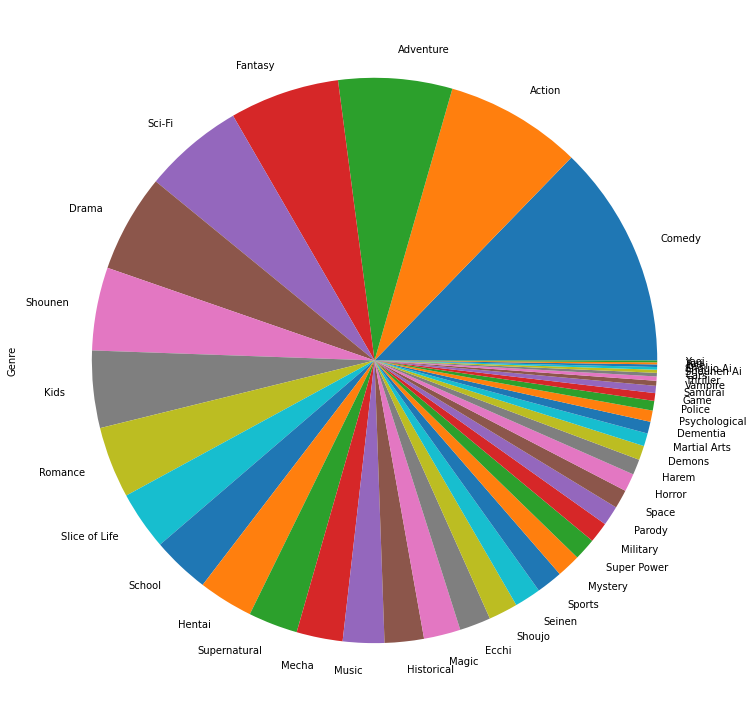

In [21]:
anime.genre.str.split(', ', expand=True).stack().value_counts().plot(kind='pie', figsize =(13,13), label = 'Genre')

In [22]:
# ANALISI LIBERA
# Adesso le possibilità sono pressoché infinite, potete studiare settorialmente i generi, i type, le distribuzioni dei rating 
# nelle varie sottofamiglie, etc.
# Questo è un ottimo dataset per esercitarsi a gestire feature binarie e metodi di classificazione o regressione molto semplici,
# per chi è interessato all'ambito Data Science è sicuramente un ottimo esercizio. Per chiunque avesse curiosità a riguardo 
# o semplicemente cercasse consigli è libero di contattarmi: Gianmarco Genalti +393479163061